<center><h1>K-Means Clustering</h1></center>

# 1. Introduction

K-Means Clustering is an unsupervised learning algorithm used to partition a dataset into distinct groups or clusters. The main idea behind K-Means is to group similar data points together based on their features, without the need for labeled data. The algorithm works by minimizing the variance within each cluster, ensuring that data points in the same cluster are as similar as possible, while those in different clusters are as distinct as possible.

The process begins with the selection of a specified number of clusters, denoted by *k*. Initially, *k* centroids are chosen randomly from the data. Each data point is then assigned to the closest centroid based on a distance metric, such as Euclidean distance. After all points are assigned to a cluster, the centroids are updated by calculating the mean of all the data points in each cluster. The assignment and centroid update steps are repeated iteratively until the algorithm converges, meaning that the assignments no longer change.

K-Means Clustering is widely applied in various fields, such as customer segmentation, image recognition, and market research, where uncovering patterns and similarities within large datasets is essential. Despite its simplicity, the K-Means algorithm is powerful and efficient for grouping data based on inherent structures, making it a fundamental tool in machine learning.


![K-MeansClustering](K-MeansClustering.png)

# 2. How Does K-Means Clustering Work?

K-Means Clustering is an iterative algorithm that divides a set of data points into a predefined number of clusters, *k*. The goal of the algorithm is to partition the data in such a way that data points in the same cluster are as similar as possible, while data points from different clusters are as distinct as possible.

### Step-by-Step Process

1. **Initialization:**
   The first step is to choose the number of clusters, *k*. This value is predetermined by the user and often based on domain knowledge or methods like the "Elbow Method" to determine the optimal *k* value. Once *k* is selected, *k* initial centroids are chosen randomly from the dataset. These centroids represent the center of each cluster.

2. **Assignment Step:**
   Each data point is assigned to the cluster whose centroid is the closest. The distance between a data point and a centroid is typically calculated using the Euclidean distance formula, although other distance metrics can also be used. After this step, each cluster contains the data points that are closest to its corresponding centroid.

   The Euclidean distance between a data point $x$ and a centroid $c$ is given by:

   $$
   d(x, c) = \sqrt{\sum_{i=1}^n (x_i - c_i)^2}
   $$

   where $x_i$ and $c_i$ represent the individual features of the data point and centroid, respectively, and $n$ is the number of features.

3. **Update Step:**
   Once all the data points are assigned to a cluster, the centroids are recalculated. The new centroid for each cluster is the mean of all the data points that belong to that cluster. This step is essential because the centroid moves to a position that better represents the center of the cluster.

   Mathematically, the new centroid $c_k$ for cluster $k$ is calculated as:

   $$
   c_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
   $$

   where $|C_k|$ is the number of data points in cluster $k$, and $x_i$ represents each data point in cluster $C_k$.

4. **Convergence:**
   The assignment and update steps are repeated iteratively. In each iteration, data points are reassigned to the closest centroid, and the centroids are updated accordingly. This process continues until convergence, which occurs when either:

   - The centroids no longer change significantly between iterations.
   - A maximum number of iterations is reached.

   At this point, the algorithm has converged, and the final clusters have been formed.

### Key Concepts in K-Means Clustering

- **Centroids:** The center of each cluster, calculated as the mean of the points within that cluster.
- **Inertia:** A measure of how internally coherent the clusters are. It is calculated as the sum of squared distances from each point to its respective centroid. Lower inertia indicates better-defined clusters.
- **Convergence:** When the centroids do not change significantly between iterations, the algorithm is considered to have converged.

---


# 3. About the Credit Card Dataset

This case requires the development of a customer segmentation model to define a marketing strategy. The sample dataset summarizes the usage behavior of about 9,000 active credit card holders over the last 6 months. The file contains customer-level data with 18 behavioral variables.

## Data Dictionary for Credit Card Dataset

- **CUST_ID**: Identification of the credit card holder (Categorical)
- **BALANCE**: Balance amount left in their account for making purchases
- **BALANCE_FREQUENCY**: How frequently the balance is updated, with a score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES**: Amount of purchases made from the account
- **ONEOFF_PURCHASES**: Maximum purchase amount made in one go
- **INSTALLMENTS_PURCHASES**: Amount of purchase done in installments
- **CASH_ADVANCE**: Cash in advance given by the user
- **PURCHASES_FREQUENCY**: How frequently purchases are made, with a score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFF_PURCHASES_FREQUENCY**: How frequently purchases are made in one go (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases are made in installments (1 = frequently done, 0 = not frequently done)
- **CASH_ADVANCE_FREQUENCY**: How frequently cash advances are paid
- **CASH_ADVANCE_TRX**: Number of transactions made with "Cash in Advance"
- **PURCHASES_TRX**: Number of purchase transactions made
- **CREDIT_LIMIT**: Credit card limit for the user
- **PAYMENTS**: Amount of payment made by the user
- **MINIMUM_PAYMENTS**: Minimum amount of payment made by the user
- **PRC_FULL_PAYMENT**: Percentage of full payment paid by the user
- **TENURE**: Tenure of the credit card service for the user

---

# 4. Steps to Apply K-Means Clustering Algorithm to Credit Card Dataset

## 1. Load the Dataset
- Import the necessary libraries for data manipulation and analysis.
- Load the Credit Card dataset into a Pandas DataFrame.
- Perform an initial inspection of the dataset to understand its structure, columns, and data types.


In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'CC GENERAL.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Perform initial inspection
# Display the first few rows of the dataset
print(df.head())

# Check the structure and data types of the dataset
print(df.info())

# Check for missing values in the dataset
print(df.isnull().sum())

# Display basic statistics for numerical columns
print(df.describe())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

## 2. Data Preprocessing
- **Handle Missing Values**: Check for any missing values in the dataset and decide how to handle them (e.g., by filling, dropping, or imputing).
- **Feature Engineering**: Remove or transform any categorical features (e.g., `CUST_ID`) and scale the numerical features to standardize the data (e.g., using Min-Max scaling or Z-score normalization).
- **Outlier Detection**: Identify and handle any potential outliers that could distort the clustering results.


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats

# 1. Handle Missing Values
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Get all numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Handle missing values by filling with mean for numerical columns only
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# 2. Feature Engineering
# Remove CUST_ID as it is not relevant for clustering
df = df.drop('CUST_ID', axis=1)

# Feature scaling (Standardization using Z-score)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# 3. Outlier Detection
# Calculate Z-scores to detect outliers
z_scores = np.abs(stats.zscore(scaled_features))

# Identify outliers (e.g., Z-score > 3)
outliers = (z_scores > 3).all(axis=1)

# Option 1: Drop the outliers
df_clean = df[~outliers]

# Re-scale the data after removing outliers
scaled_features_clean = scaler.fit_transform(df_clean)

# Display the first few rows of the cleaned and scaled dataset
print("Cleaned and Scaled Data:\n", df_clean.head())

Missing Values:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Cleaned and Scaled Data:
        BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1

## 3. Feature Selection
- Select the relevant features for clustering, excluding irrelevant ones such as `CUST_ID`.
- Optionally, perform feature selection or dimensionality reduction (e.g., PCA) if necessary.


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Feature Selection
# Since we already dropped 'CUST_ID' in previous steps, we'll proceed with the cleaned data
# In this case, 'CUST_ID' is already excluded and data has been standardized

# 2. Optional: Apply PCA for dimensionality reduction (if necessary)
# For example, let's reduce the data to 2 principal components
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features_clean)  # scaled_features_clean is the cleaned and scaled data

# 3. Convert PCA features into a DataFrame for easier visualization
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])

# 4. Display the explained variance ratio of the components
print("Explained Variance Ratio by Components:", pca.explained_variance_ratio_)

# 5. Display the PCA DataFrame (first few rows)
print("PCA Transformed Data:\n", pca_df.head())

Explained Variance Ratio by Components: [0.27290037 0.20301991]
PCA Transformed Data:
        PCA1      PCA2
0 -1.682220 -1.076451
1 -1.138295  2.506477
2  0.969684 -0.383520
3 -0.873628  0.043166
4 -1.599434 -0.688581


## 4. Determine the Optimal Number of Clusters
- Use the **Elbow Method** to determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WCSS) for different values of k.
- Optionally, you can use other methods like the **Silhouette Score** to validate the optimal number of clusters.

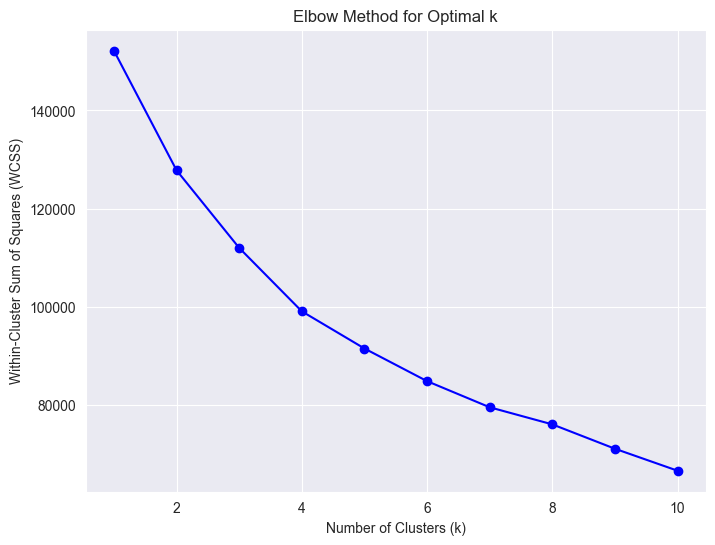

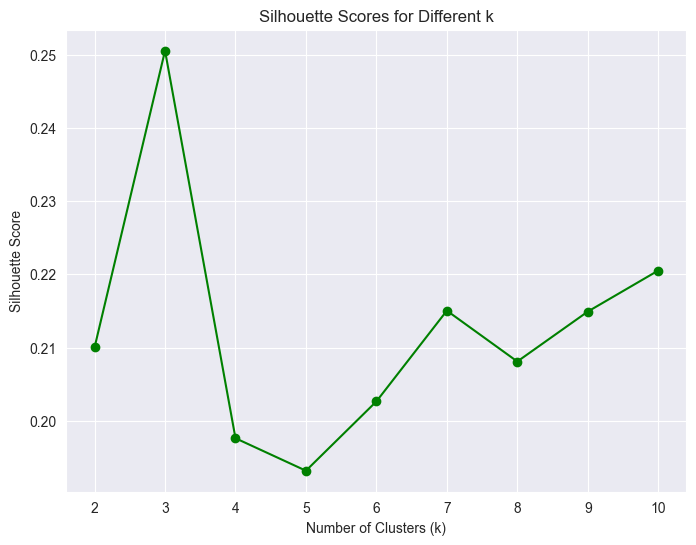

Silhouette Scores: [np.float64(0.21003302619400505), np.float64(0.25055570796307736), np.float64(0.1976074492720698), np.float64(0.1931688590154638), np.float64(0.20263931739848778), np.float64(0.21503808606365246), np.float64(0.20809196271641647), np.float64(0.2149116403835865), np.float64(0.2205181120683996)]


In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# 1. Elbow Method: Plot WCSS for different values of k
wcss = []  # List to store WCSS values
max_k = 10  # Maximum number of clusters to test

for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features_clean)  # Using the scaled features
    wcss.append(kmeans.inertia_)  # Inertia (WCSS)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k+1), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# 2. Silhouette Score: Calculate for different k values
sil_scores = []  # List to store Silhouette Scores

for k in range(2, max_k+1):  # Silhouette score cannot be computed for k=1
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features_clean)
    sil_score = silhouette_score(scaled_features_clean, cluster_labels)
    sil_scores.append(sil_score)

# Plotting Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, max_k+1), sil_scores, marker='o', color='g')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Display the silhouette scores
print("Silhouette Scores:", sil_scores)

## 5. Apply K-Means Clustering
- Initialize the K-Means model with the optimal number of clusters (k).
- Fit the K-Means model to the scaled data.
- Assign each data point to a cluster.

In [9]:
from sklearn.cluster import KMeans

# 1. Initialize the K-Means model with the optimal number of clusters (k)
# Let's assume k = 5 (as an example, but use the optimal k from Elbow or Silhouette methods)
optimal_k = 5  # Replace with the optimal k from the previous analysis

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)

# 2. Fit the K-Means model to the scaled data
kmeans.fit(scaled_features_clean)

# 3. Assign each data point to a cluster
cluster_labels = kmeans.labels_

# 4. Add cluster labels to the original dataset (optional)
df['Cluster'] = cluster_labels

# 5. Display the first few rows with assigned clusters
print("First few rows with assigned clusters:")
print(df.head())

# 6. Get the cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_
print("\nCluster Centers (Centroids):")
print(cluster_centers)

First few rows with assigned clusters:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                

## 6. Analyze the Clusters
- Inspect the cluster centroids to understand the characteristics of each cluster.
- Analyze the distribution of data points across clusters.
- Interpret the results and identify key patterns or trends in each cluster (e.g., high spenders, low credit limit users, etc.).

Cluster Centers (Centroids):
[[-0.24677902 -0.33939807 -0.33903084 -0.22089839 -0.39566665 -0.17138962
  -0.81468188 -0.35387313 -0.75161306 -0.08229266 -0.15285966 -0.47309603
  -0.31657504 -0.25129863 -0.11770396 -0.28394314 -0.04635117]
 [-0.44140423  0.10563947 -0.09611534 -0.25644002  0.24381616 -0.38189341
   0.91219357 -0.39897182  1.08089649 -0.48529723 -0.37212943  0.07789307
  -0.35609142 -0.27561902 -0.07742684  0.40370783 -0.04651275]
 [ 1.4302377   0.41946659  6.91504796  6.08303393  5.17226599  0.03877815
   1.09069901  1.87930303  1.04941338 -0.2492271  -0.03816597  4.64622756
   2.19837119  4.78370351  1.08094535  0.82400116  0.33461299]
 [ 1.46655118  0.38250217 -0.23873861 -0.17495232 -0.24317002  1.73791655
  -0.52270696 -0.24136418 -0.45850033  1.77696161  1.67057961 -0.29536932
   0.83923249  0.6414133   0.49924223 -0.40284483 -0.10245432]
 [ 0.15865284  0.43135799  0.89618078  0.84042162  0.57493872 -0.29813682
   1.08031506  1.78236288  0.55632055 -0.38433836 -0.

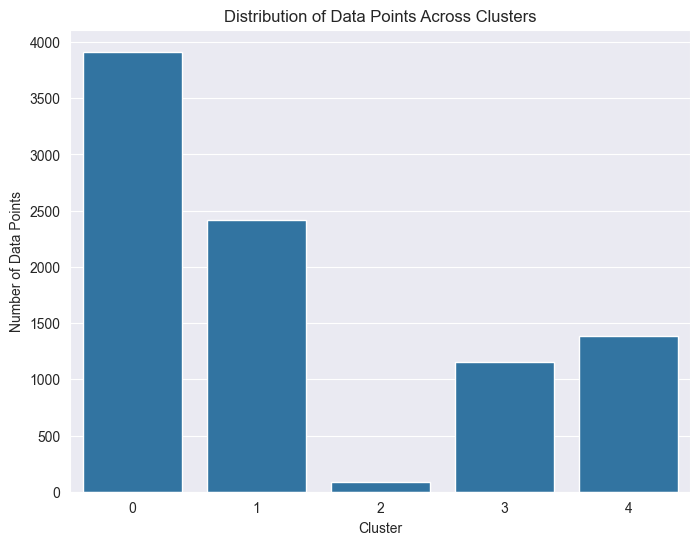


Key Statistics for Each Cluster:
             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                   
0        1051.107777           0.796963    278.843906        225.791285   
1         645.271105           0.902145    797.879354        166.799462   
2        4541.393882           0.976638  15777.311395      10689.027791   
3        4616.977320           0.967882    493.136111        302.052352   
4        1894.697328           0.979455   2917.908886       1987.365134   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     53.254890    619.459069             0.163358   
1                    631.574004    178.022789             0.856492   
2                   5088.283605   1060.190695             0.928101   
3                    191.172014   4623.363303             0.280563   
4                   

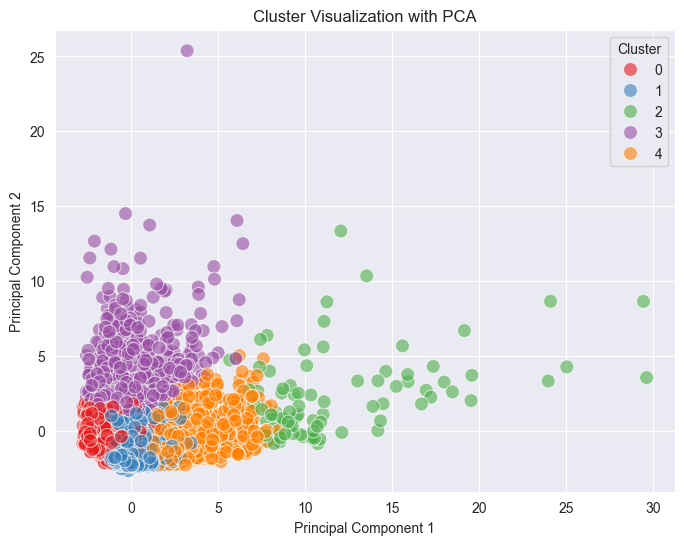

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inspect the cluster centroids
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

# 2. Analyze the distribution of data points across clusters
cluster_counts = df['Cluster'].value_counts()
print("\nCluster Distribution:")
print(cluster_counts)

# 3. Visualize the distribution of data points across clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()

# 4. Compare key statistics for each cluster (e.g., mean, median)
cluster_stats = df.groupby('Cluster').mean()
print("\nKey Statistics for Each Cluster:")
print(cluster_stats)

# 5. Visualize the clusters (Optional: If you have more than 2 features, reduce dimensionality using PCA)
from sklearn.decomposition import PCA

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features_clean)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='Set1', s=100, alpha=0.6)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## 7. Interpret the Results and Define Marketing Strategy
- Based on the clustering analysis, define actionable marketing strategies for each customer segment (e.g., offer tailored promotions to high spenders, improve credit limits for low credit users, etc.).
- Analyze the business implications of the customer segments.


### 1. Cluster 0: Mid-Range Spenders
- **Balance**: $1,051 (moderate balance)
- **Purchases**: $278.84 (moderate spending)
- **Cash Advance**: $619.46 (moderate cash advances)
- **Installments Purchases**: $53.25 (moderate installment usage)
- **Purchase Frequency**: 0.16 (low spending frequency)
- **Credit Limit**: $3,342 (moderate credit limit)
- **Payments**: $1,006.13 (moderate payments)

**Interpretation**:
This group represents moderate spenders who are not using their credit extensively, especially in terms of purchases and installments. They may be using their cards more cautiously, perhaps as an emergency source of credit or for occasional purchases.

**Strategy**:
- Focus on increasing card usage with personalized promotions for purchases.
- Encourage them to utilize installment options and offer incentives to increase their spending frequency.

---

### 2. Cluster 1: High Purchase Frequency, Lower Balance
- **Balance**: $645.27 (low balance)
- **Purchases**: $797.88 (high purchases)
- **Cash Advance**: $178.02 (low cash advances)
- **Installments Purchases**: $631.57 (significant installment usage)
- **Purchase Frequency**: 0.86 (high purchase frequency)
- **Credit Limit**: $3,199 (low to moderate credit limit)
- **Payments**: $934.49 (moderate payments)

**Interpretation**:
Customers in this cluster are frequent users of their credit cards and prefer to make purchases in installments. Their balances are relatively low compared to their purchasing habits, suggesting that they manage their credit well but are active spenders.

**Strategy**:
- Offer rewards for frequent purchases and promote the benefits of credit card usage (e.g., loyalty points).
- Consider increasing their credit limits to give them more flexibility in spending.

---

### 3. Cluster 2: High-End Users with Significant Purchases
- **Balance**: $4,541.39 (high balance)
- **Purchases**: $15,777.31 (very high purchases)
- **Cash Advance**: $1,060.19 (significant cash advances)
- **Installments Purchases**: $5,088.28 (high installment usage)
- **Purchase Frequency**: 0.93 (very high purchase frequency)
- **Credit Limit**: $12,493 (very high credit limit)
- **Payments**: $15,581.50 (very high payments)

**Interpretation**:
This is the high-value cluster, consisting of customers with very high balances and spending. They likely have premium credit cards and regularly use their credit for both large purchases and cash advances. Their high payment behavior suggests they are able to manage or pay off their balances.

**Strategy**:
- Provide exclusive offers or premium services, such as concierge services.
- Focus on customer retention with personalized high-end benefits and targeted promotions.

---

### 4. Cluster 3: High Cash Advance Users
- **Balance**: $4,616.98 (high balance)
- **Purchases**: $493.14 (moderate purchases)
- **Cash Advance**: $4,623.36 (extremely high cash advances)
- **Installments Purchases**: $191.17 (low installment usage)
- **Purchase Frequency**: 0.28 (low purchase frequency)
- **Credit Limit**: $7,547.92 (high credit limit)
- **Payments**: $3,589.97 (high payments)

**Interpretation**:
This cluster represents high cash advance users who may be utilizing their credit card for liquidity rather than regular purchases. Their lower spending on purchases and high cash advance activity suggests they may be facing financial challenges or using credit for immediate needs.

**Strategy**:
- Provide financial management tools, such as balance transfers or debt consolidation options.
- Offer lower-interest rates on cash advances to help manage their debt more effectively.
- Explore ways to encourage regular purchases rather than relying on cash advances.

---

### 5. Cluster 4: Balanced Users with Moderate Activity
- **Balance**: $1,894.70 (moderate balance)
- **Purchases**: $2,917.91 (moderate to high purchases)
- **Cash Advance**: $353.66 (low cash advances)
- **Installments Purchases**: $930.98 (moderate installment usage)
- **Purchase Frequency**: 0.92 (high purchase frequency)
- **Credit Limit**: $6,975.78 (moderate to high credit limit)
- **Payments**: $2,777.44 (moderate payments)

**Interpretation**:
This cluster appears to have a balanced financial profile with moderate to high usage of the credit card. They are frequent spenders but manage their credit responsibly with a balance between purchases and installment options.

**Strategy**:
- Promote responsible credit usage, and encourage spending through loyalty rewards.
- Offer personalized advice on how to manage credit limits effectively and incentivize higher usage with tailored promotions.

---

## Business Implications and Strategy

- **High-Spending Clusters (Cluster 2 and Cluster 3)**:
These customers represent high value and require premium offers, exclusive services, and rewards to maintain their engagement. Special attention should be given to offering luxury services or financial solutions that cater to their spending behavior.

- **Moderate Usage Clusters (Cluster 0, Cluster 1, and Cluster 4)**:
These customers represent a mix of moderate and high usage, and offering personalized rewards or financial products (like higher credit limits or installment plans) could improve engagement and encourage spending.

By tailoring marketing strategies based on the financial profiles of each cluster, businesses can improve customer satisfaction, retention, and overall profitability.


## 8. Conclusion
- Summarize the insights derived from the customer segmentation and their potential impact on marketing strategies.
- Discuss any limitations of the K-Means algorithm and possible improvements or alternative methods.


The customer segmentation analysis reveals valuable insights into the different financial behaviors of customers, which can be leveraged to optimize marketing strategies. Below are the key insights:

1. **High-End Spenders (Cluster 2)**:
   Customers in this cluster are high-value individuals with substantial credit usage and high payment capacity. Targeted strategies for these customers could include exclusive offers, loyalty rewards, and premium services to further strengthen customer retention and engagement.

2. **Moderate Spenders with Low Credit Usage (Cluster 0)**:
   This cluster consists of moderate spenders who are more cautious in their credit usage. Marketing strategies could focus on offering promotions that encourage higher card usage and provide benefits like installment payment plans to incentivize them to spend more frequently.

3. **Frequent Purchasers with Low Balances (Cluster 1)**:
   Customers in this group use their credit cards frequently but maintain lower balances. To optimize their spending, marketing efforts should include offering rewards for frequent use and exploring ways to increase their credit limits to support larger purchases.

4. **Cash Advance Heavy Users (Cluster 3)**:
   This group primarily relies on cash advances. Marketing strategies should aim to provide financial support through debt management tools and personalized guidance, while also introducing incentives to encourage more balanced use of credit cards for purchases rather than cash advances.

5. **Balanced Credit Users (Cluster 4)**:
   Customers in this cluster maintain a balanced approach to credit usage with moderate spending. Offering customized rewards and financial advice could help them maintain or increase their current spending levels while ensuring responsible usage.

### Potential Impact on Marketing Strategies:
- **Personalized Marketing**: Understanding the specific needs and spending habits of each cluster allows for the creation of tailored marketing strategies, ensuring that promotions and services resonate with each customer segment.
- **Customer Retention**: By catering to the unique preferences of each cluster, businesses can enhance customer loyalty and reduce churn, especially for high-value users.
- **Optimizing Resource Allocation**: Businesses can allocate resources more efficiently by focusing on high-potential customer segments that are more likely to respond to targeted offers and services.

### Limitations of the K-Means Algorithm:
While K-Means is a widely used and powerful clustering algorithm, it has several limitations:
1. **Sensitivity to Initial Centroids**: K-Means is sensitive to the initial placement of centroids, which can lead to suboptimal cluster solutions. The algorithm can converge to a local minimum, which may not represent the true clusters.
2. **Assumption of Spherical Clusters**: K-Means assumes that clusters are spherical and evenly sized. This assumption may not hold true in real-world data, leading to poorly defined clusters for complex or irregularly shaped data.
3. **Fixed Number of Clusters**: K-Means requires the number of clusters (k) to be predefined, which can lead to inaccuracies if the chosen value of k does not reflect the true underlying structure of the data.
4. **Sensitivity to Outliers**: K-Means is sensitive to outliers, which can distort the cluster centroids and impact the quality of clustering results.

### Possible Improvements or Alternative Methods:
1. **K-Means++**: To address the sensitivity to initial centroids, the K-Means++ initialization method can be used, which spreads out the initial centroids more effectively, leading to better clustering performance.
2. **Hierarchical Clustering**: An alternative clustering method, such as hierarchical clustering, could be considered, especially if the data contains clusters of different shapes or densities. Hierarchical clustering does not require the number of clusters to be predefined and produces a tree-like structure (dendrogram) that can be useful for understanding the relationships between clusters.
3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: DBSCAN is a density-based clustering algorithm that can handle clusters of arbitrary shape and is more robust to outliers, making it a suitable alternative for data with varying densities.
4. **Gaussian Mixture Models (GMM)**: GMM can be used for soft clustering where each data point can belong to multiple clusters with different probabilities. This is useful when the assumption of hard clustering in K-Means does not hold.

### Conclusion:
The K-Means clustering algorithm has provided valuable insights into customer behavior, helping to identify distinct segments with differing financial profiles. By tailoring marketing strategies to each segment, businesses can improve customer satisfaction and retention. However, the algorithm's limitations highlight the need for exploring alternative clustering methods, especially for more complex datasets. Future improvements could include experimenting with different clustering techniques or optimizing the pre-processing steps to enhance model performance.
